# PCA DATA IRIS (NAIVEBAYES)

PCA (Principal Component Analysis) adalah metode yang digunakan dalam analisis statistik dan pemrosesan data untuk mengurangi dimensi dari dataset yang kompleks. Tujuan utama dari PCA adalah untuk mengidentifikasi dan mempertahankan informasi yang paling penting dalam dataset dengan mengubahnya ke ruang fitur yang baru, yang disebut sebagai komponen utama.

In [ ]:
#Import Librari
import seaborn as sns
from sklearn.model_selection import train_test_split

iris = sns.load_dataset('iris') #memuat dataset Iris yang tersedia secara default dalam library tersebut
X_iris = iris.drop('species', axis=1) #membuat variabel X_iris yang merupakan versi dataset Iris tanpa kolom 'species'
y_iris = iris['species'] #membuat variabel y_iris yang berisi kolom 'species' dari dataset Iris. 

#pemisahan dataset Iris menjadi data latih (train) dan data uji (test) menggunakan fungsi train_test_split dari library scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=10) 

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 4)
Test set shape: (30, 4)


In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)   #menginisialisasi objek PCA. 
model.fit(X_iris)              

PCA(n_components=2)

In [ ]:
print("check nomor components", model.n_components_)

check nomor components 2


# Transformasi data 
Tranformasi data dalam konteks PCA merujuk pada proses mengubah dataset asli ke dalam ruang fitur yang baru berdasarkan komponen utama yang dihasilkan oleh PCA. Proses transformasi ini melibatkan proyeksi data asli ke dalam ruang fitur baru yang dikonstruksi oleh komponen utama.

In [ ]:
X_2D = model.transform(X_iris) #melakukan transformasi dataset X_iris

In [ ]:
print("menampilkan data baris pertama", X_2D[0,:])

menampilkan data baris pertama [-2.68412563  0.31939725]


In [ ]:
# mengubah setiap baris data
print(model.transform(X_iris.iloc[0, :].values.reshape(1, -1)))

[[-2.68412563  0.31939725]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# Memasukkan X_2D ke dalam Iris DataFrame asli
X_2D merujuk pada representasi dua dimensi dari dataset yang telah melalui transformasi PCA. Lebih spesifik, X_2D adalah variabel yang berisi dataset Iris (X_iris) setelah diproyeksikan ke dalam ruang fitur baru yang terdiri dari dua komponen utama terpenting.

In [ ]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

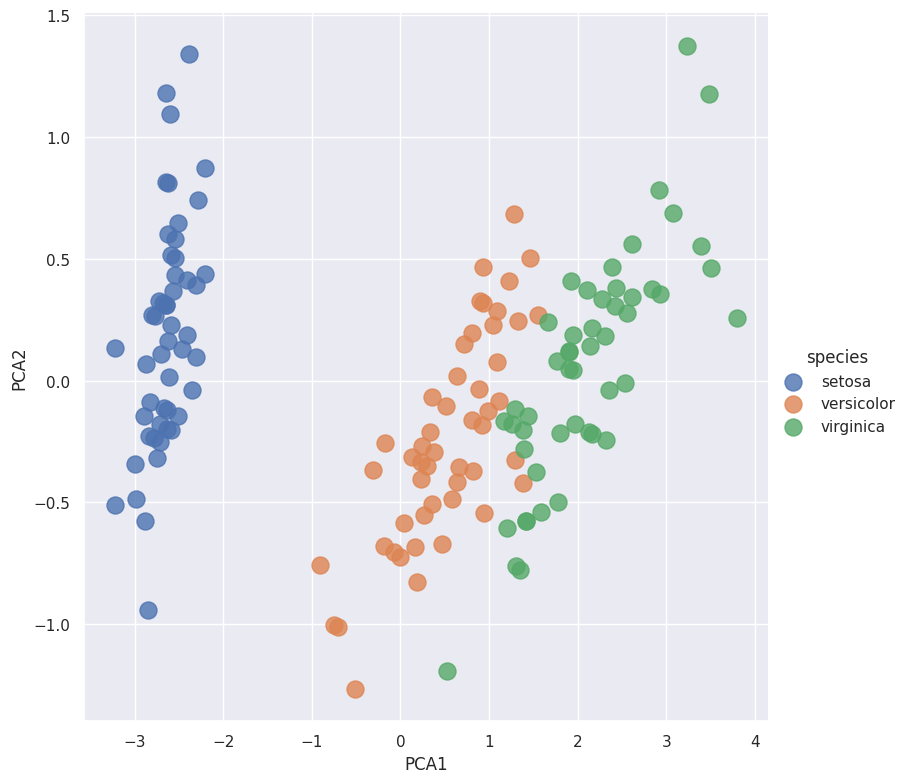

In [ ]:
import seaborn as sns
#Membuat plot pemetaan linier antara PCA1 dan PCA2 dari dataset Iris (iris).
sns.lmplot(x="PCA1",y="PCA2", hue='species', data=iris, fit_reg=False, height=8, scatter_kws={"s": 150})

# Mengubah jumlah komponen 

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=3)    #membuat objek PCA dengan mengatur jumlah komponen utama (n_components) menjadi 3
model.fit(X_iris)              #melatih (fit) model PCA dengan menggunakan dataset X_iris.
X_2D = model.transform(X_iris) # berarti Anda menggunakan model PCA (model) yang telah dilatih sebelumnya untuk mentransformasikan dataset X_iris

iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
iris['PCA3'] = X_2D[:,2]

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


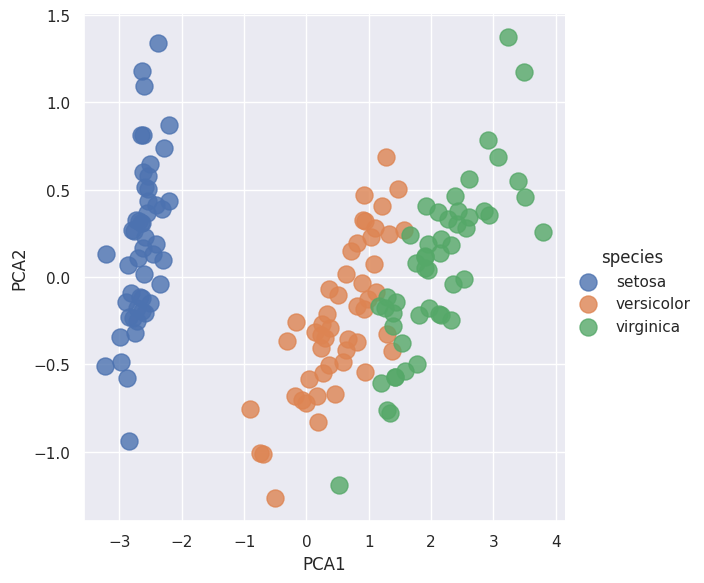

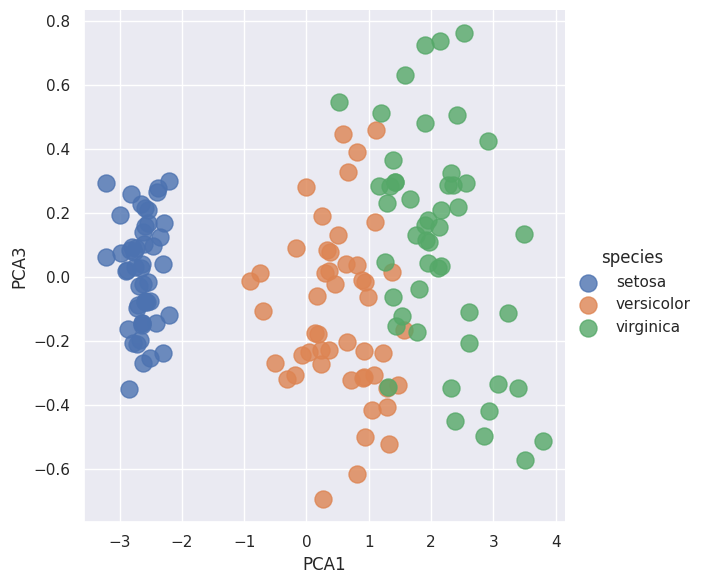

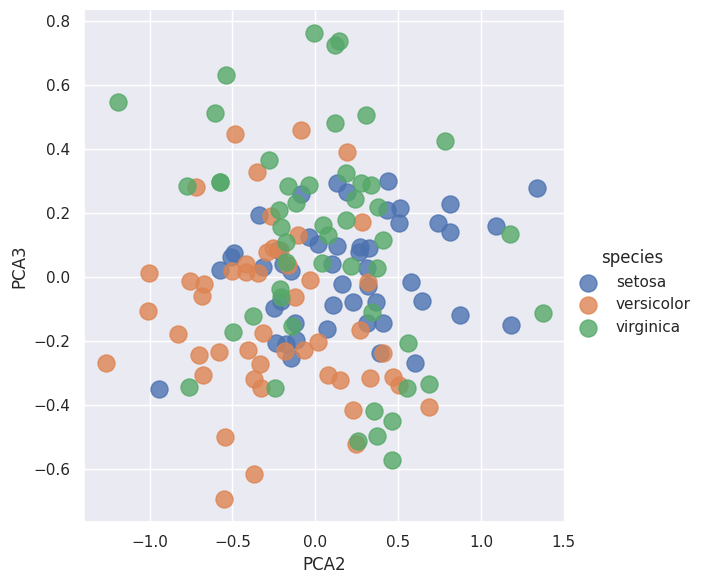

In [ ]:
import seaborn as sns
sns.set()
#membuat plot pemetaan linier antara kolom 'PCA1' dan kolom 'PCA2' dari DataFrame iris dengan beberapa pengaturan tambahan. 
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False, height=6, scatter_kws={"s": 150})
sns.lmplot(x="PCA1", y="PCA3", hue='species', data=iris, fit_reg=False, height=6, scatter_kws={"s": 150})
sns.lmplot(x="PCA2", y="PCA3", hue='species', data=iris, fit_reg=False, height=6, scatter_kws={"s": 150})

# Melakukan pelatihan fitur baru menggunakan Naive Bayes

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,PCA3
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079


In [ ]:
from sklearn.model_selection import train_test_split

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [ ]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width,PCA1,PCA2,PCA3
54,6.5,2.8,4.6,1.5,1.088103,0.074591,-0.307758
108,6.7,2.5,5.8,1.8,2.321229,-0.243832,-0.348304
112,6.8,3.0,5.5,2.1,2.165592,0.216276,0.033327
17,5.1,3.5,1.4,0.3,-2.648297,0.311849,0.026668
119,6.0,2.2,5.0,1.5,1.300792,-0.761150,-0.344995


In [ ]:
ytrain.head()


54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [ ]:
Xtrain = Xtrain[['PCA1', 'PCA2', 'PCA3']]

Xtrain.head(5) #data uji

,PCA1,PCA2,PCA3
54,1.088103,0.074591,-0.307758
108,2.321229,-0.243832,-0.348304
112,2.165592,0.216276,0.033327
17,-2.648297,0.311849,0.026668
119,1.300792,-0.761150,-0.344995


In [ ]:
Xtest = Xtest[['PCA1','PCA2','PCA3']]

Xtest.head(5)#data latih

,PCA1,PCA2,PCA3
14,-2.644750,1.178765,-0.151628
98,-0.906470,-0.756093,-0.012600
75,0.900174,0.328504,-0.316209
16,-2.623528,0.810680,0.138183
131,3.230674,1.374165,-0.114548


In [ ]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()                       
model.fit(Xtrain, ytrain) # melatih (fit) model dengan menggunakan subset pelatihan (Xtrain dan ytrain) dari dataset Iris.                 

GaussianNB()

In [ ]:
y_model = model.predict(Xtest)  

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9473684210526315

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

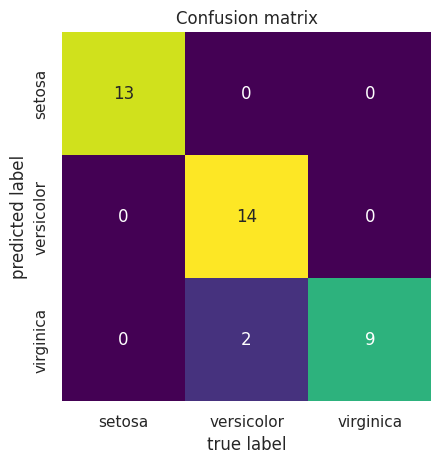

In [ ]:
# membuat sebuah heatmap (peta panas) dari matriks mat dengan menggunakan library seaborn (diasumsikan sebagai sns).
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()